287

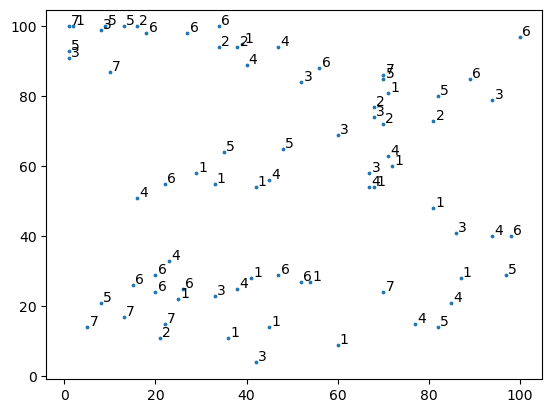

In [110]:
import collections
from tqdm import tqdm

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

data = pd.read_csv('./data.csv')
start = data.loc[0,['x','y']].values
data = data.loc[1:,['x','y','demand']]
plt.scatter(data=data,x='x',y='y',s=3)

for i in data.values:
    plt.text(x=i[0]+0.5,y=i[1]+0.5,s=str(i[2]),fontsize=10)

data['demand'].sum()

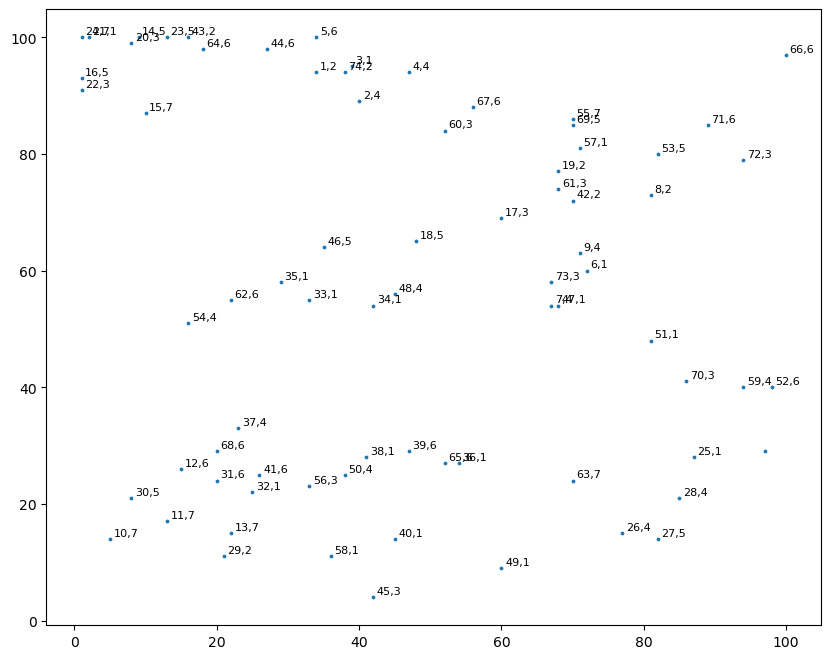

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./data.csv')
start = data.loc[0,['x','y']].values
data = data.loc[1:,['x','y','demand']]

plt.figure(figsize=(10,8))
plt.scatter(data=data,x='x',y='y',s=3)

for i in range(1,len(data)):
    x,y,d = data.loc[i,['x','y','demand']]
    plt.text(x=x+0.5,y=y+0.5,s=str(f'{i},{d}'),fontsize=8)


In [3]:
data = pd.read_csv('./data.csv')
answer = []
for i in range(1,len(data)):
    pt,x,y,d = data.loc[i,:]
    for _ in range(d):
        answer.append((pt,x,y))
data = pd.DataFrame(data=answer,columns=['point_id','x','y'])
data

,point_id,x,y
0,TOWN_01,34,94
1,TOWN_01,34,94
2,TOWN_02,40,89
3,TOWN_02,40,89
4,TOWN_02,40,89
...,...,...,...
282,TOWN_75,97,29
283,TOWN_75,97,29
284,TOWN_75,97,29
285,TOWN_75,97,29


In [216]:
from sklearn.cluster import KMeans
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('./data.csv')
data = data.loc[1:,['x','y','demand']]
X = data[['x','y']]
n = 12

process = 10000
for p in tqdm(range(process)):
    random_state = int(np.random.random()*(10**8))
    km = KMeans(n_clusters=n,random_state=random_state,init='random')
    km.fit(X)
    data['group'] = km.predict(X)
    check = [sum(pd.DataFrame(data.groupby('group'))[1][i]['demand']) for i in range(n)]
    flag = False
    for v in check:
        if v > 30 or v < 20:
            flag = True
            break
    
    if not flag:
        print(f'process stoped {p}')
        break
    
            

 17%|█████████████▏                                                               | 1710/10000 [10:34<51:17,  2.69it/s]


KeyboardInterrupt: 

In [241]:
data = pd.read_csv('./data.csv')
data = data.loc[1:,['x','y','demand']]
X = data[['x','y']]
random_state = 7373504
n = 12

km = KMeans(n_clusters=n,random_state=random_state,n_init='auto')
data['group'] = km.fit_predict(X)
check = [sum(pd.DataFrame(data.groupby('group'))[1][i]['demand']) for i in range(n)]
check

[20, 26, 27, 21, 20, 27, 28, 20, 21, 25, 23, 29]

7373504
[20, 26, 27, 21, 20, 27, 28, 20, 21, 25, 23, 29]


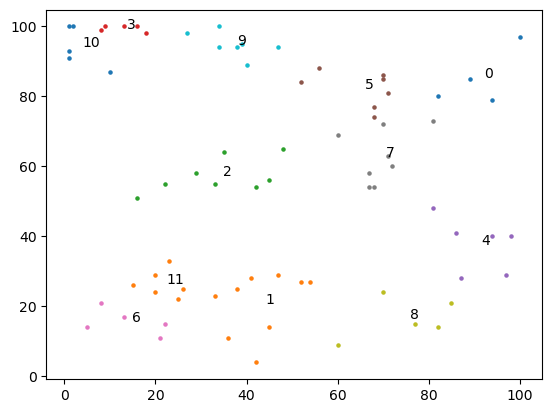

In [242]:
temp = pd.DataFrame(data.groupby('group'))
for i in range(n):
    dt = temp[1][i][['x','y']]
    plt.scatter(dt['x'],dt['y'],s=5)
    
temp = km.cluster_centers_
for i in range(len(temp)):
    s,e = temp[i]
#     plt.scatter(s,e,c='blue',s=3)
    plt.text(s+1,e,s=f'{i}')

print(random_state)
print([sum(pd.DataFrame(data.groupby('group'))[1][i]['demand']) for i in range(n)])


In [134]:
data

,x,y,demand,group
1,34,94,2,9
2,40,89,4,9
3,39,95,1,9
4,47,94,4,9
5,34,100,6,9
...,...,...,...,...
71,89,85,6,0
72,94,79,3,0
73,67,58,3,7
74,38,94,2,9


In [293]:
# 필요한 라이브러리 임포트
import math
import pandas as pd
import numpy as np
from scipy.spatial.distance import squareform, pdist

# 데이터 파일 경로
data_path = './data.csv'  # 참가자가 제공받은 경로로 설정
data = pd.read_csv(data_path)

# 산타의 썰매 용량
santa_capacity = 25
process = 100
# 출발점 설정 및 경로 초기화
answer = math.inf

route = ["DEPOT"]
total_distance = 0
current_capacity = santa_capacity

# 모든 포인트 간 거리 계산 (거리 행렬 생성)
points = data[['x', 'y']].values
distance_matrix = squareform(pdist(points, metric='euclidean'))
distance_df = pd.DataFrame(distance_matrix, index=data['point_id'], columns=data['point_id'])

# DEPOT과 방문해야 할 포인트 분리
remaining_points = data[data['point_id'] != 'DEPOT'].copy()
current_position = town

feasible_points = remaining_points[remaining_points['demand'] <= current_capacity].copy()
feasible_points

,point_id,x,y,demand
1,TOWN_01,34,94,2
2,TOWN_02,40,89,4
3,TOWN_03,39,95,1
4,TOWN_04,47,94,4
5,TOWN_05,34,100,6
...,...,...,...,...
71,TOWN_71,89,85,6
72,TOWN_72,94,79,3
73,TOWN_73,67,58,3
74,TOWN_74,38,94,2


In [284]:
# 필요한 라이브러리 임포트
import math
import pandas as pd
import numpy as np
from scipy.spatial.distance import squareform, pdist

# 데이터 파일 경로
data_path = './data.csv'  # 참가자가 제공받은 경로로 설정
data = pd.read_csv(data_path)

# 산타의 썰매 용량
santa_capacity = 25
process = 100
# 출발점 설정 및 경로 초기화
answer = math.inf
for _ in tqdm(range(process)):
for town in data['point_id']:
    route = ["DEPOT"]
    total_distance = 0
    current_capacity = santa_capacity

    # 모든 포인트 간 거리 계산 (거리 행렬 생성)
    points = data[['x', 'y']].values
    distance_matrix = squareform(pdist(points, metric='euclidean'))
    distance_df = pd.DataFrame(distance_matrix, index=data['point_id'], columns=data['point_id'])

    # DEPOT과 방문해야 할 포인트 분리
    remaining_points = data[data['point_id'] != 'DEPOT'].copy()
    current_position = town

#     print("데이터 전처리 및 초기 설정 완료!")

    while not remaining_points.empty:
        # 현재 용량으로 방문 가능한 포인트 필터링
        feasible_points = remaining_points[remaining_points['demand'] <= current_capacity].copy()

        # 방문 가능한 포인트가 없는 경우: DEPOT으로 복귀
        if feasible_points.empty:
            # DEPOT 복귀
            total_distance += distance_df.loc[current_position, 'DEPOT']
            route.append("DEPOT")
            current_position = "DEPOT"
            current_capacity = santa_capacity
            continue

        # 가장 가까운 포인트 선택 (거리 계산 후 추가)
        feasible_points['distance'] = feasible_points['point_id'].apply(
            lambda x: distance_df.loc[current_position, x]
        )
        nearest_point = feasible_points.loc[feasible_points['distance'].idxmin()]

        # 경로 업데이트
        route.append(nearest_point['point_id'])
        total_distance += distance_df.loc[current_position, nearest_point['point_id']]
        current_position = nearest_point['point_id']
        current_capacity -= nearest_point['demand']

        # 방문한 포인트 제거
        remaining_points = remaining_points[remaining_points['point_id'] != nearest_point['point_id']].copy()

    # 마지막으로 DEPOT으로 복귀
    total_distance += distance_df.loc[current_position, 'DEPOT']
    route.append("DEPOT")

#     print("탐욕 알고리즘 실행 완료!")
#     print(f"총 이동 거리: {total_distance}")

총 이동 거리: 2687.2839186154524
총 이동 거리: 2477.285524847436
총 이동 거리: 2429.6739661031206
총 이동 거리: 2503.2917393599
총 이동 거리: 2422.4722180754097
총 이동 거리: 2497.9454877131575
총 이동 거리: 2497.0561265803644
총 이동 거리: 2479.3644412262106
총 이동 거리: 2425.6054515989586
총 이동 거리: 2496.0381671500663
총 이동 거리: 2672.417849868134
총 이동 거리: 2678.818804762654
총 이동 거리: 2651.7907967051724
총 이동 거리: 2687.536871335926
총 이동 거리: 2361.017936276132
총 이동 거리: 2355.267444565482
총 이동 거리: 2417.011052110053
총 이동 거리: 2428.4316470209315
총 이동 거리: 2438.4321338873565
총 이동 거리: 2515.5908109828424
총 이동 거리: 2359.918916762539
총 이동 거리: 2355.5852656287584
총 이동 거리: 2415.011052110053
총 이동 거리: 2517.1387635475007
총 이동 거리: 2394.1249016198467
총 이동 거리: 2629.9120804206286
총 이동 거리: 2609.582962232387
총 이동 거리: 2611.9671891265234
총 이동 거리: 2564.699284455374
총 이동 거리: 2663.577379433193
총 이동 거리: 2679.747035402108
총 이동 거리: 2634.8340647967084
총 이동 거리: 2681.822659625045
총 이동 거리: 2590.963699639015
총 이동 거리: 2463.833040422501
총 이동 거리: 2581.6309416742133
총 이동 거리: 24

In [338]:
# 필요한 라이브러리 임포트
import math
import pandas as pd
import numpy as np
from scipy.spatial.distance import squareform, pdist
from tqdm import tqdm

# 데이터 파일 경로
data_path = './data.csv'  # 참가자가 제공한 파일 경로로 설정
data = pd.read_csv(data_path)

# 산타의 썰매 용량 및 반복 횟수 설정
santa_capacity = 25
process = 100  # 여러 번 반복 실행하여 최적 경로를 찾기 위함

# DEPOT과 나머지 포인트 간 거리 행렬 계산
points = data[['x', 'y']].values
distance_matrix = squareform(pdist(points, metric='euclidean'))
distance_df = pd.DataFrame(distance_matrix, index=data['point_id'], columns=data['point_id'])

# 탐욕 알고리즘 반복 실행
best_route = None
minimum_distance = math.inf

for _ in tqdm(range(process), desc="최적 경로 탐색 중"):
    # DEPOT과 나머지 포인트 초기화
    remaining_points = data[data['point_id'] != 'DEPOT'].copy()
    total_distance = 0
    current_capacity = santa_capacity
#     print(remaining_points)
    # 랜덤으로 초기 출발점 설정
    r = np.random.randint(1,76)
    start_point = remaining_points['point_id'][r] # .values[0]  # 무작위 선택
    current_position = start_point
    route = ["DEPOT", start_point]  # 초기 경로에 DEPOT과 출발점 추가
    total_distance += distance_df.loc["DEPOT", start_point]
    
    current_capacity -= data[data['point_id'] == start_point]['demand'].values[0]
    
    # 출발점은 초기화 후 제거
    remaining_points = remaining_points[remaining_points['point_id'] != start_point].copy()

    while not remaining_points.empty:
        # 현재 용량으로 방문 가능한 포인트 필터링
        feasible_points = remaining_points[remaining_points['demand'] <= current_capacity].copy()

        # 방문 가능한 포인트가 없는 경우 처리
        if feasible_points.empty:
            # DEPOT 복귀 및 용량 초기화
            total_distance += distance_df.loc[current_position, 'DEPOT']
            route.append("DEPOT")
            current_position = "DEPOT"
            current_capacity = santa_capacity
            continue

        # 가장 가까운 포인트 선택
        feasible_points['distance'] = feasible_points['point_id'].apply(
            lambda x: distance_df.loc[current_position, x]
        )
        nearest_point = feasible_points.loc[feasible_points['distance'].idxmin()]

        # 경로 및 거리 업데이트
        route.append(nearest_point['point_id'])
        total_distance += nearest_point['distance']
        current_position = nearest_point['point_id']
        current_capacity -= nearest_point['demand']

        # 방문한 포인트 제거
        remaining_points = remaining_points[remaining_points['point_id'] != nearest_point['point_id']].copy()

    # 마지막으로 DEPOT 복귀
    total_distance += distance_df.loc[current_position, 'DEPOT']
    route.append("DEPOT")

    # 최적 경로 및 최소 거리 갱신
    if total_distance < minimum_distance:
        minimum_distance = total_distance
        best_route = route

# 결과 출력
    print(f"최소 이동 거리: {minimum_distance}")
    print(f"최적 경로: {best_route}")


최적 경로 탐색 중:   2%|█▎                                                             | 2/100 [00:00<00:10,  9.75it/s]

최소 이동 거리: 2543.7490776532036
최적 경로: ['DEPOT', 'TOWN_61', 'TOWN_42', 'TOWN_19', 'TOWN_57', 'TOWN_69', 'TOWN_55', 'TOWN_53', 'DEPOT', 'TOWN_10', 'TOWN_30', 'TOWN_11', 'TOWN_12', 'DEPOT', 'TOWN_29', 'TOWN_13', 'TOWN_32', 'TOWN_41', 'TOWN_31', 'TOWN_56', 'DEPOT', 'TOWN_68', 'TOWN_37', 'TOWN_50', 'TOWN_38', 'TOWN_39', 'TOWN_36', 'TOWN_40', 'TOWN_58', 'TOWN_49', 'DEPOT', 'TOWN_45', 'TOWN_65', 'TOWN_63', 'TOWN_26', 'TOWN_27', 'DEPOT', 'TOWN_54', 'TOWN_62', 'TOWN_35', 'TOWN_33', 'TOWN_34', 'TOWN_48', 'TOWN_18', 'TOWN_17', 'DEPOT', 'TOWN_46', 'TOWN_02', 'TOWN_74', 'TOWN_03', 'TOWN_01', 'TOWN_05', 'TOWN_04', 'TOWN_06', 'DEPOT', 'TOWN_07', 'TOWN_47', 'TOWN_73', 'TOWN_09', 'TOWN_08', 'TOWN_72', 'TOWN_71', 'TOWN_51', 'TOWN_25', 'DEPOT', 'TOWN_28', 'TOWN_75', 'TOWN_52', 'TOWN_59', 'TOWN_70', 'TOWN_60', 'DEPOT', 'TOWN_15', 'TOWN_22', 'TOWN_16', 'TOWN_24', 'TOWN_21', 'TOWN_43', 'DEPOT', 'TOWN_20', 'TOWN_14', 'TOWN_23', 'TOWN_64', 'TOWN_44', 'DEPOT', 'TOWN_67', 'TOWN_66', 'DEPOT']
최소 이동 거리: 2543.749077

최적 경로 탐색 중:   8%|█████                                                          | 8/100 [00:00<00:08, 10.86it/s]

최소 이동 거리: 2543.7490776532036
최적 경로: ['DEPOT', 'TOWN_61', 'TOWN_42', 'TOWN_19', 'TOWN_57', 'TOWN_69', 'TOWN_55', 'TOWN_53', 'DEPOT', 'TOWN_10', 'TOWN_30', 'TOWN_11', 'TOWN_12', 'DEPOT', 'TOWN_29', 'TOWN_13', 'TOWN_32', 'TOWN_41', 'TOWN_31', 'TOWN_56', 'DEPOT', 'TOWN_68', 'TOWN_37', 'TOWN_50', 'TOWN_38', 'TOWN_39', 'TOWN_36', 'TOWN_40', 'TOWN_58', 'TOWN_49', 'DEPOT', 'TOWN_45', 'TOWN_65', 'TOWN_63', 'TOWN_26', 'TOWN_27', 'DEPOT', 'TOWN_54', 'TOWN_62', 'TOWN_35', 'TOWN_33', 'TOWN_34', 'TOWN_48', 'TOWN_18', 'TOWN_17', 'DEPOT', 'TOWN_46', 'TOWN_02', 'TOWN_74', 'TOWN_03', 'TOWN_01', 'TOWN_05', 'TOWN_04', 'TOWN_06', 'DEPOT', 'TOWN_07', 'TOWN_47', 'TOWN_73', 'TOWN_09', 'TOWN_08', 'TOWN_72', 'TOWN_71', 'TOWN_51', 'TOWN_25', 'DEPOT', 'TOWN_28', 'TOWN_75', 'TOWN_52', 'TOWN_59', 'TOWN_70', 'TOWN_60', 'DEPOT', 'TOWN_15', 'TOWN_22', 'TOWN_16', 'TOWN_24', 'TOWN_21', 'TOWN_43', 'DEPOT', 'TOWN_20', 'TOWN_14', 'TOWN_23', 'TOWN_64', 'TOWN_44', 'DEPOT', 'TOWN_67', 'TOWN_66', 'DEPOT']
최소 이동 거리: 2543.749077

최적 경로 탐색 중:  12%|███████▍                                                      | 12/100 [00:01<00:07, 11.22it/s]

최소 이동 거리: 2542.9152808004637
최적 경로: ['DEPOT', 'TOWN_71', 'TOWN_72', 'TOWN_53', 'TOWN_08', 'TOWN_42', 'TOWN_61', 'TOWN_19', 'TOWN_57', 'TOWN_06', 'DEPOT', 'TOWN_10', 'TOWN_30', 'TOWN_11', 'TOWN_12', 'DEPOT', 'TOWN_29', 'TOWN_13', 'TOWN_32', 'TOWN_41', 'TOWN_31', 'TOWN_56', 'DEPOT', 'TOWN_68', 'TOWN_37', 'TOWN_50', 'TOWN_38', 'TOWN_39', 'TOWN_36', 'TOWN_40', 'TOWN_58', 'TOWN_49', 'DEPOT', 'TOWN_45', 'TOWN_65', 'TOWN_63', 'TOWN_26', 'TOWN_27', 'DEPOT', 'TOWN_54', 'TOWN_62', 'TOWN_35', 'TOWN_33', 'TOWN_34', 'TOWN_48', 'TOWN_18', 'TOWN_17', 'DEPOT', 'TOWN_46', 'TOWN_02', 'TOWN_74', 'TOWN_03', 'TOWN_01', 'TOWN_05', 'TOWN_04', 'TOWN_47', 'DEPOT', 'TOWN_07', 'TOWN_73', 'TOWN_09', 'TOWN_51', 'TOWN_70', 'TOWN_59', 'TOWN_52', 'DEPOT', 'TOWN_28', 'TOWN_25', 'TOWN_75', 'TOWN_69', 'TOWN_55', 'TOWN_60', 'DEPOT', 'TOWN_15', 'TOWN_22', 'TOWN_16', 'TOWN_24', 'TOWN_21', 'TOWN_43', 'DEPOT', 'TOWN_20', 'TOWN_14', 'TOWN_23', 'TOWN_64', 'TOWN_44', 'DEPOT', 'TOWN_67', 'TOWN_66', 'DEPOT']
최소 이동 거리: 2542.915280

최적 경로 탐색 중:  14%|████████▋                                                     | 14/100 [00:01<00:07, 11.02it/s]

최소 이동 거리: 2542.9152808004637
최적 경로: ['DEPOT', 'TOWN_71', 'TOWN_72', 'TOWN_53', 'TOWN_08', 'TOWN_42', 'TOWN_61', 'TOWN_19', 'TOWN_57', 'TOWN_06', 'DEPOT', 'TOWN_10', 'TOWN_30', 'TOWN_11', 'TOWN_12', 'DEPOT', 'TOWN_29', 'TOWN_13', 'TOWN_32', 'TOWN_41', 'TOWN_31', 'TOWN_56', 'DEPOT', 'TOWN_68', 'TOWN_37', 'TOWN_50', 'TOWN_38', 'TOWN_39', 'TOWN_36', 'TOWN_40', 'TOWN_58', 'TOWN_49', 'DEPOT', 'TOWN_45', 'TOWN_65', 'TOWN_63', 'TOWN_26', 'TOWN_27', 'DEPOT', 'TOWN_54', 'TOWN_62', 'TOWN_35', 'TOWN_33', 'TOWN_34', 'TOWN_48', 'TOWN_18', 'TOWN_17', 'DEPOT', 'TOWN_46', 'TOWN_02', 'TOWN_74', 'TOWN_03', 'TOWN_01', 'TOWN_05', 'TOWN_04', 'TOWN_47', 'DEPOT', 'TOWN_07', 'TOWN_73', 'TOWN_09', 'TOWN_51', 'TOWN_70', 'TOWN_59', 'TOWN_52', 'DEPOT', 'TOWN_28', 'TOWN_25', 'TOWN_75', 'TOWN_69', 'TOWN_55', 'TOWN_60', 'DEPOT', 'TOWN_15', 'TOWN_22', 'TOWN_16', 'TOWN_24', 'TOWN_21', 'TOWN_43', 'DEPOT', 'TOWN_20', 'TOWN_14', 'TOWN_23', 'TOWN_64', 'TOWN_44', 'DEPOT', 'TOWN_67', 'TOWN_66', 'DEPOT']
최소 이동 거리: 2542.915280

최적 경로 탐색 중:  18%|███████████▏                                                  | 18/100 [00:01<00:07, 11.46it/s]

최소 이동 거리: 2487.8626282879627
최적 경로: ['DEPOT', 'TOWN_48', 'TOWN_34', 'TOWN_33', 'TOWN_35', 'TOWN_62', 'TOWN_54', 'TOWN_37', 'TOWN_32', 'TOWN_56', 'DEPOT', 'TOWN_10', 'TOWN_30', 'TOWN_11', 'TOWN_12', 'DEPOT', 'TOWN_29', 'TOWN_13', 'TOWN_31', 'TOWN_68', 'TOWN_50', 'DEPOT', 'TOWN_41', 'TOWN_38', 'TOWN_39', 'TOWN_65', 'TOWN_36', 'TOWN_40', 'TOWN_58', 'TOWN_45', 'DEPOT', 'TOWN_49', 'TOWN_26', 'TOWN_27', 'TOWN_28', 'TOWN_25', 'TOWN_75', 'TOWN_59', 'TOWN_51', 'DEPOT', 'TOWN_46', 'TOWN_18', 'TOWN_17', 'TOWN_61', 'TOWN_42', 'TOWN_19', 'TOWN_57', 'TOWN_08', 'TOWN_06', 'TOWN_47', 'DEPOT', 'TOWN_63', 'TOWN_70', 'TOWN_52', 'TOWN_07', 'TOWN_73', 'TOWN_74', 'DEPOT', 'TOWN_15', 'TOWN_22', 'TOWN_16', 'TOWN_24', 'TOWN_21', 'TOWN_43', 'DEPOT', 'TOWN_09', 'TOWN_53', 'TOWN_71', 'TOWN_72', 'TOWN_66', 'TOWN_03', 'DEPOT', 'TOWN_02', 'TOWN_01', 'TOWN_05', 'TOWN_44', 'TOWN_64', 'DEPOT', 'TOWN_60', 'TOWN_67', 'TOWN_04', 'TOWN_55', 'TOWN_69', 'DEPOT', 'TOWN_20', 'TOWN_14', 'TOWN_23', 'DEPOT']
최소 이동 거리: 2487.862628

최적 경로 탐색 중:  22%|█████████████▋                                                | 22/100 [00:01<00:06, 11.17it/s]

최소 이동 거리: 2487.8626282879627
최적 경로: ['DEPOT', 'TOWN_48', 'TOWN_34', 'TOWN_33', 'TOWN_35', 'TOWN_62', 'TOWN_54', 'TOWN_37', 'TOWN_32', 'TOWN_56', 'DEPOT', 'TOWN_10', 'TOWN_30', 'TOWN_11', 'TOWN_12', 'DEPOT', 'TOWN_29', 'TOWN_13', 'TOWN_31', 'TOWN_68', 'TOWN_50', 'DEPOT', 'TOWN_41', 'TOWN_38', 'TOWN_39', 'TOWN_65', 'TOWN_36', 'TOWN_40', 'TOWN_58', 'TOWN_45', 'DEPOT', 'TOWN_49', 'TOWN_26', 'TOWN_27', 'TOWN_28', 'TOWN_25', 'TOWN_75', 'TOWN_59', 'TOWN_51', 'DEPOT', 'TOWN_46', 'TOWN_18', 'TOWN_17', 'TOWN_61', 'TOWN_42', 'TOWN_19', 'TOWN_57', 'TOWN_08', 'TOWN_06', 'TOWN_47', 'DEPOT', 'TOWN_63', 'TOWN_70', 'TOWN_52', 'TOWN_07', 'TOWN_73', 'TOWN_74', 'DEPOT', 'TOWN_15', 'TOWN_22', 'TOWN_16', 'TOWN_24', 'TOWN_21', 'TOWN_43', 'DEPOT', 'TOWN_09', 'TOWN_53', 'TOWN_71', 'TOWN_72', 'TOWN_66', 'TOWN_03', 'DEPOT', 'TOWN_02', 'TOWN_01', 'TOWN_05', 'TOWN_44', 'TOWN_64', 'DEPOT', 'TOWN_60', 'TOWN_67', 'TOWN_04', 'TOWN_55', 'TOWN_69', 'DEPOT', 'TOWN_20', 'TOWN_14', 'TOWN_23', 'DEPOT']
최소 이동 거리: 2487.862628

최적 경로 탐색 중:  24%|██████████████▉                                               | 24/100 [00:02<00:06, 11.22it/s]

최소 이동 거리: 2487.8626282879627
최적 경로: ['DEPOT', 'TOWN_48', 'TOWN_34', 'TOWN_33', 'TOWN_35', 'TOWN_62', 'TOWN_54', 'TOWN_37', 'TOWN_32', 'TOWN_56', 'DEPOT', 'TOWN_10', 'TOWN_30', 'TOWN_11', 'TOWN_12', 'DEPOT', 'TOWN_29', 'TOWN_13', 'TOWN_31', 'TOWN_68', 'TOWN_50', 'DEPOT', 'TOWN_41', 'TOWN_38', 'TOWN_39', 'TOWN_65', 'TOWN_36', 'TOWN_40', 'TOWN_58', 'TOWN_45', 'DEPOT', 'TOWN_49', 'TOWN_26', 'TOWN_27', 'TOWN_28', 'TOWN_25', 'TOWN_75', 'TOWN_59', 'TOWN_51', 'DEPOT', 'TOWN_46', 'TOWN_18', 'TOWN_17', 'TOWN_61', 'TOWN_42', 'TOWN_19', 'TOWN_57', 'TOWN_08', 'TOWN_06', 'TOWN_47', 'DEPOT', 'TOWN_63', 'TOWN_70', 'TOWN_52', 'TOWN_07', 'TOWN_73', 'TOWN_74', 'DEPOT', 'TOWN_15', 'TOWN_22', 'TOWN_16', 'TOWN_24', 'TOWN_21', 'TOWN_43', 'DEPOT', 'TOWN_09', 'TOWN_53', 'TOWN_71', 'TOWN_72', 'TOWN_66', 'TOWN_03', 'DEPOT', 'TOWN_02', 'TOWN_01', 'TOWN_05', 'TOWN_44', 'TOWN_64', 'DEPOT', 'TOWN_60', 'TOWN_67', 'TOWN_04', 'TOWN_55', 'TOWN_69', 'DEPOT', 'TOWN_20', 'TOWN_14', 'TOWN_23', 'DEPOT']
최소 이동 거리: 2487.862628

최적 경로 탐색 중:  28%|█████████████████▎                                            | 28/100 [00:02<00:06, 10.91it/s]

최소 이동 거리: 2487.8626282879627
최적 경로: ['DEPOT', 'TOWN_48', 'TOWN_34', 'TOWN_33', 'TOWN_35', 'TOWN_62', 'TOWN_54', 'TOWN_37', 'TOWN_32', 'TOWN_56', 'DEPOT', 'TOWN_10', 'TOWN_30', 'TOWN_11', 'TOWN_12', 'DEPOT', 'TOWN_29', 'TOWN_13', 'TOWN_31', 'TOWN_68', 'TOWN_50', 'DEPOT', 'TOWN_41', 'TOWN_38', 'TOWN_39', 'TOWN_65', 'TOWN_36', 'TOWN_40', 'TOWN_58', 'TOWN_45', 'DEPOT', 'TOWN_49', 'TOWN_26', 'TOWN_27', 'TOWN_28', 'TOWN_25', 'TOWN_75', 'TOWN_59', 'TOWN_51', 'DEPOT', 'TOWN_46', 'TOWN_18', 'TOWN_17', 'TOWN_61', 'TOWN_42', 'TOWN_19', 'TOWN_57', 'TOWN_08', 'TOWN_06', 'TOWN_47', 'DEPOT', 'TOWN_63', 'TOWN_70', 'TOWN_52', 'TOWN_07', 'TOWN_73', 'TOWN_74', 'DEPOT', 'TOWN_15', 'TOWN_22', 'TOWN_16', 'TOWN_24', 'TOWN_21', 'TOWN_43', 'DEPOT', 'TOWN_09', 'TOWN_53', 'TOWN_71', 'TOWN_72', 'TOWN_66', 'TOWN_03', 'DEPOT', 'TOWN_02', 'TOWN_01', 'TOWN_05', 'TOWN_44', 'TOWN_64', 'DEPOT', 'TOWN_60', 'TOWN_67', 'TOWN_04', 'TOWN_55', 'TOWN_69', 'DEPOT', 'TOWN_20', 'TOWN_14', 'TOWN_23', 'DEPOT']
최소 이동 거리: 2487.862628

최적 경로 탐색 중:  30%|██████████████████▌                                           | 30/100 [00:02<00:06, 11.03it/s]

최소 이동 거리: 2487.8626282879627
최적 경로: ['DEPOT', 'TOWN_48', 'TOWN_34', 'TOWN_33', 'TOWN_35', 'TOWN_62', 'TOWN_54', 'TOWN_37', 'TOWN_32', 'TOWN_56', 'DEPOT', 'TOWN_10', 'TOWN_30', 'TOWN_11', 'TOWN_12', 'DEPOT', 'TOWN_29', 'TOWN_13', 'TOWN_31', 'TOWN_68', 'TOWN_50', 'DEPOT', 'TOWN_41', 'TOWN_38', 'TOWN_39', 'TOWN_65', 'TOWN_36', 'TOWN_40', 'TOWN_58', 'TOWN_45', 'DEPOT', 'TOWN_49', 'TOWN_26', 'TOWN_27', 'TOWN_28', 'TOWN_25', 'TOWN_75', 'TOWN_59', 'TOWN_51', 'DEPOT', 'TOWN_46', 'TOWN_18', 'TOWN_17', 'TOWN_61', 'TOWN_42', 'TOWN_19', 'TOWN_57', 'TOWN_08', 'TOWN_06', 'TOWN_47', 'DEPOT', 'TOWN_63', 'TOWN_70', 'TOWN_52', 'TOWN_07', 'TOWN_73', 'TOWN_74', 'DEPOT', 'TOWN_15', 'TOWN_22', 'TOWN_16', 'TOWN_24', 'TOWN_21', 'TOWN_43', 'DEPOT', 'TOWN_09', 'TOWN_53', 'TOWN_71', 'TOWN_72', 'TOWN_66', 'TOWN_03', 'DEPOT', 'TOWN_02', 'TOWN_01', 'TOWN_05', 'TOWN_44', 'TOWN_64', 'DEPOT', 'TOWN_60', 'TOWN_67', 'TOWN_04', 'TOWN_55', 'TOWN_69', 'DEPOT', 'TOWN_20', 'TOWN_14', 'TOWN_23', 'DEPOT']
최소 이동 거리: 2487.862628

최적 경로 탐색 중:  34%|█████████████████████                                         | 34/100 [00:03<00:06, 10.86it/s]

최소 이동 거리: 2453.5342398127523
최적 경로: ['DEPOT', 'TOWN_43', 'TOWN_64', 'TOWN_23', 'TOWN_14', 'TOWN_20', 'TOWN_21', 'TOWN_22', 'DEPOT', 'TOWN_10', 'TOWN_30', 'TOWN_11', 'TOWN_12', 'DEPOT', 'TOWN_29', 'TOWN_13', 'TOWN_32', 'TOWN_41', 'TOWN_31', 'TOWN_56', 'DEPOT', 'TOWN_68', 'TOWN_37', 'TOWN_50', 'TOWN_38', 'TOWN_39', 'TOWN_36', 'TOWN_40', 'TOWN_58', 'TOWN_49', 'DEPOT', 'TOWN_45', 'TOWN_65', 'TOWN_63', 'TOWN_26', 'TOWN_27', 'DEPOT', 'TOWN_54', 'TOWN_62', 'TOWN_35', 'TOWN_33', 'TOWN_34', 'TOWN_48', 'TOWN_18', 'TOWN_17', 'DEPOT', 'TOWN_46', 'TOWN_02', 'TOWN_74', 'TOWN_03', 'TOWN_01', 'TOWN_05', 'TOWN_04', 'TOWN_57', 'DEPOT', 'TOWN_07', 'TOWN_47', 'TOWN_73', 'TOWN_06', 'TOWN_09', 'TOWN_42', 'TOWN_61', 'TOWN_19', 'TOWN_69', 'DEPOT', 'TOWN_28', 'TOWN_25', 'TOWN_75', 'TOWN_52', 'TOWN_59', 'TOWN_70', 'TOWN_51', 'DEPOT', 'TOWN_15', 'TOWN_16', 'TOWN_24', 'TOWN_44', 'DEPOT', 'TOWN_60', 'TOWN_67', 'TOWN_55', 'TOWN_53', 'TOWN_08', 'DEPOT', 'TOWN_72', 'TOWN_71', 'TOWN_66', 'DEPOT']
최소 이동 거리: 2453.534239

최적 경로 탐색 중:  38%|███████████████████████▌                                      | 38/100 [00:03<00:05, 11.10it/s]

최소 이동 거리: 2453.5342398127523
최적 경로: ['DEPOT', 'TOWN_43', 'TOWN_64', 'TOWN_23', 'TOWN_14', 'TOWN_20', 'TOWN_21', 'TOWN_22', 'DEPOT', 'TOWN_10', 'TOWN_30', 'TOWN_11', 'TOWN_12', 'DEPOT', 'TOWN_29', 'TOWN_13', 'TOWN_32', 'TOWN_41', 'TOWN_31', 'TOWN_56', 'DEPOT', 'TOWN_68', 'TOWN_37', 'TOWN_50', 'TOWN_38', 'TOWN_39', 'TOWN_36', 'TOWN_40', 'TOWN_58', 'TOWN_49', 'DEPOT', 'TOWN_45', 'TOWN_65', 'TOWN_63', 'TOWN_26', 'TOWN_27', 'DEPOT', 'TOWN_54', 'TOWN_62', 'TOWN_35', 'TOWN_33', 'TOWN_34', 'TOWN_48', 'TOWN_18', 'TOWN_17', 'DEPOT', 'TOWN_46', 'TOWN_02', 'TOWN_74', 'TOWN_03', 'TOWN_01', 'TOWN_05', 'TOWN_04', 'TOWN_57', 'DEPOT', 'TOWN_07', 'TOWN_47', 'TOWN_73', 'TOWN_06', 'TOWN_09', 'TOWN_42', 'TOWN_61', 'TOWN_19', 'TOWN_69', 'DEPOT', 'TOWN_28', 'TOWN_25', 'TOWN_75', 'TOWN_52', 'TOWN_59', 'TOWN_70', 'TOWN_51', 'DEPOT', 'TOWN_15', 'TOWN_16', 'TOWN_24', 'TOWN_44', 'DEPOT', 'TOWN_60', 'TOWN_67', 'TOWN_55', 'TOWN_53', 'TOWN_08', 'DEPOT', 'TOWN_72', 'TOWN_71', 'TOWN_66', 'DEPOT']
최소 이동 거리: 2453.534239

최적 경로 탐색 중:  42%|██████████████████████████                                    | 42/100 [00:03<00:05, 11.31it/s]

최소 이동 거리: 2453.5342398127523
최적 경로: ['DEPOT', 'TOWN_43', 'TOWN_64', 'TOWN_23', 'TOWN_14', 'TOWN_20', 'TOWN_21', 'TOWN_22', 'DEPOT', 'TOWN_10', 'TOWN_30', 'TOWN_11', 'TOWN_12', 'DEPOT', 'TOWN_29', 'TOWN_13', 'TOWN_32', 'TOWN_41', 'TOWN_31', 'TOWN_56', 'DEPOT', 'TOWN_68', 'TOWN_37', 'TOWN_50', 'TOWN_38', 'TOWN_39', 'TOWN_36', 'TOWN_40', 'TOWN_58', 'TOWN_49', 'DEPOT', 'TOWN_45', 'TOWN_65', 'TOWN_63', 'TOWN_26', 'TOWN_27', 'DEPOT', 'TOWN_54', 'TOWN_62', 'TOWN_35', 'TOWN_33', 'TOWN_34', 'TOWN_48', 'TOWN_18', 'TOWN_17', 'DEPOT', 'TOWN_46', 'TOWN_02', 'TOWN_74', 'TOWN_03', 'TOWN_01', 'TOWN_05', 'TOWN_04', 'TOWN_57', 'DEPOT', 'TOWN_07', 'TOWN_47', 'TOWN_73', 'TOWN_06', 'TOWN_09', 'TOWN_42', 'TOWN_61', 'TOWN_19', 'TOWN_69', 'DEPOT', 'TOWN_28', 'TOWN_25', 'TOWN_75', 'TOWN_52', 'TOWN_59', 'TOWN_70', 'TOWN_51', 'DEPOT', 'TOWN_15', 'TOWN_16', 'TOWN_24', 'TOWN_44', 'DEPOT', 'TOWN_60', 'TOWN_67', 'TOWN_55', 'TOWN_53', 'TOWN_08', 'DEPOT', 'TOWN_72', 'TOWN_71', 'TOWN_66', 'DEPOT']
최소 이동 거리: 2453.534239

최적 경로 탐색 중:  46%|████████████████████████████▌                                 | 46/100 [00:04<00:04, 11.33it/s]

최소 이동 거리: 2453.5342398127523
최적 경로: ['DEPOT', 'TOWN_43', 'TOWN_64', 'TOWN_23', 'TOWN_14', 'TOWN_20', 'TOWN_21', 'TOWN_22', 'DEPOT', 'TOWN_10', 'TOWN_30', 'TOWN_11', 'TOWN_12', 'DEPOT', 'TOWN_29', 'TOWN_13', 'TOWN_32', 'TOWN_41', 'TOWN_31', 'TOWN_56', 'DEPOT', 'TOWN_68', 'TOWN_37', 'TOWN_50', 'TOWN_38', 'TOWN_39', 'TOWN_36', 'TOWN_40', 'TOWN_58', 'TOWN_49', 'DEPOT', 'TOWN_45', 'TOWN_65', 'TOWN_63', 'TOWN_26', 'TOWN_27', 'DEPOT', 'TOWN_54', 'TOWN_62', 'TOWN_35', 'TOWN_33', 'TOWN_34', 'TOWN_48', 'TOWN_18', 'TOWN_17', 'DEPOT', 'TOWN_46', 'TOWN_02', 'TOWN_74', 'TOWN_03', 'TOWN_01', 'TOWN_05', 'TOWN_04', 'TOWN_57', 'DEPOT', 'TOWN_07', 'TOWN_47', 'TOWN_73', 'TOWN_06', 'TOWN_09', 'TOWN_42', 'TOWN_61', 'TOWN_19', 'TOWN_69', 'DEPOT', 'TOWN_28', 'TOWN_25', 'TOWN_75', 'TOWN_52', 'TOWN_59', 'TOWN_70', 'TOWN_51', 'DEPOT', 'TOWN_15', 'TOWN_16', 'TOWN_24', 'TOWN_44', 'DEPOT', 'TOWN_60', 'TOWN_67', 'TOWN_55', 'TOWN_53', 'TOWN_08', 'DEPOT', 'TOWN_72', 'TOWN_71', 'TOWN_66', 'DEPOT']
최소 이동 거리: 2453.534239

최적 경로 탐색 중:  48%|█████████████████████████████▊                                | 48/100 [00:04<00:04, 11.11it/s]

최소 이동 거리: 2453.5342398127523
최적 경로: ['DEPOT', 'TOWN_43', 'TOWN_64', 'TOWN_23', 'TOWN_14', 'TOWN_20', 'TOWN_21', 'TOWN_22', 'DEPOT', 'TOWN_10', 'TOWN_30', 'TOWN_11', 'TOWN_12', 'DEPOT', 'TOWN_29', 'TOWN_13', 'TOWN_32', 'TOWN_41', 'TOWN_31', 'TOWN_56', 'DEPOT', 'TOWN_68', 'TOWN_37', 'TOWN_50', 'TOWN_38', 'TOWN_39', 'TOWN_36', 'TOWN_40', 'TOWN_58', 'TOWN_49', 'DEPOT', 'TOWN_45', 'TOWN_65', 'TOWN_63', 'TOWN_26', 'TOWN_27', 'DEPOT', 'TOWN_54', 'TOWN_62', 'TOWN_35', 'TOWN_33', 'TOWN_34', 'TOWN_48', 'TOWN_18', 'TOWN_17', 'DEPOT', 'TOWN_46', 'TOWN_02', 'TOWN_74', 'TOWN_03', 'TOWN_01', 'TOWN_05', 'TOWN_04', 'TOWN_57', 'DEPOT', 'TOWN_07', 'TOWN_47', 'TOWN_73', 'TOWN_06', 'TOWN_09', 'TOWN_42', 'TOWN_61', 'TOWN_19', 'TOWN_69', 'DEPOT', 'TOWN_28', 'TOWN_25', 'TOWN_75', 'TOWN_52', 'TOWN_59', 'TOWN_70', 'TOWN_51', 'DEPOT', 'TOWN_15', 'TOWN_16', 'TOWN_24', 'TOWN_44', 'DEPOT', 'TOWN_60', 'TOWN_67', 'TOWN_55', 'TOWN_53', 'TOWN_08', 'DEPOT', 'TOWN_72', 'TOWN_71', 'TOWN_66', 'DEPOT']
최소 이동 거리: 2453.534239

최적 경로 탐색 중:  52%|████████████████████████████████▏                             | 52/100 [00:04<00:04, 11.21it/s]

최소 이동 거리: 2453.5342398127523
최적 경로: ['DEPOT', 'TOWN_43', 'TOWN_64', 'TOWN_23', 'TOWN_14', 'TOWN_20', 'TOWN_21', 'TOWN_22', 'DEPOT', 'TOWN_10', 'TOWN_30', 'TOWN_11', 'TOWN_12', 'DEPOT', 'TOWN_29', 'TOWN_13', 'TOWN_32', 'TOWN_41', 'TOWN_31', 'TOWN_56', 'DEPOT', 'TOWN_68', 'TOWN_37', 'TOWN_50', 'TOWN_38', 'TOWN_39', 'TOWN_36', 'TOWN_40', 'TOWN_58', 'TOWN_49', 'DEPOT', 'TOWN_45', 'TOWN_65', 'TOWN_63', 'TOWN_26', 'TOWN_27', 'DEPOT', 'TOWN_54', 'TOWN_62', 'TOWN_35', 'TOWN_33', 'TOWN_34', 'TOWN_48', 'TOWN_18', 'TOWN_17', 'DEPOT', 'TOWN_46', 'TOWN_02', 'TOWN_74', 'TOWN_03', 'TOWN_01', 'TOWN_05', 'TOWN_04', 'TOWN_57', 'DEPOT', 'TOWN_07', 'TOWN_47', 'TOWN_73', 'TOWN_06', 'TOWN_09', 'TOWN_42', 'TOWN_61', 'TOWN_19', 'TOWN_69', 'DEPOT', 'TOWN_28', 'TOWN_25', 'TOWN_75', 'TOWN_52', 'TOWN_59', 'TOWN_70', 'TOWN_51', 'DEPOT', 'TOWN_15', 'TOWN_16', 'TOWN_24', 'TOWN_44', 'DEPOT', 'TOWN_60', 'TOWN_67', 'TOWN_55', 'TOWN_53', 'TOWN_08', 'DEPOT', 'TOWN_72', 'TOWN_71', 'TOWN_66', 'DEPOT']
최소 이동 거리: 2453.534239

최적 경로 탐색 중:  54%|█████████████████████████████████▍                            | 54/100 [00:04<00:03, 11.52it/s]

최소 이동 거리: 2453.5342398127523
최적 경로: ['DEPOT', 'TOWN_43', 'TOWN_64', 'TOWN_23', 'TOWN_14', 'TOWN_20', 'TOWN_21', 'TOWN_22', 'DEPOT', 'TOWN_10', 'TOWN_30', 'TOWN_11', 'TOWN_12', 'DEPOT', 'TOWN_29', 'TOWN_13', 'TOWN_32', 'TOWN_41', 'TOWN_31', 'TOWN_56', 'DEPOT', 'TOWN_68', 'TOWN_37', 'TOWN_50', 'TOWN_38', 'TOWN_39', 'TOWN_36', 'TOWN_40', 'TOWN_58', 'TOWN_49', 'DEPOT', 'TOWN_45', 'TOWN_65', 'TOWN_63', 'TOWN_26', 'TOWN_27', 'DEPOT', 'TOWN_54', 'TOWN_62', 'TOWN_35', 'TOWN_33', 'TOWN_34', 'TOWN_48', 'TOWN_18', 'TOWN_17', 'DEPOT', 'TOWN_46', 'TOWN_02', 'TOWN_74', 'TOWN_03', 'TOWN_01', 'TOWN_05', 'TOWN_04', 'TOWN_57', 'DEPOT', 'TOWN_07', 'TOWN_47', 'TOWN_73', 'TOWN_06', 'TOWN_09', 'TOWN_42', 'TOWN_61', 'TOWN_19', 'TOWN_69', 'DEPOT', 'TOWN_28', 'TOWN_25', 'TOWN_75', 'TOWN_52', 'TOWN_59', 'TOWN_70', 'TOWN_51', 'DEPOT', 'TOWN_15', 'TOWN_16', 'TOWN_24', 'TOWN_44', 'DEPOT', 'TOWN_60', 'TOWN_67', 'TOWN_55', 'TOWN_53', 'TOWN_08', 'DEPOT', 'TOWN_72', 'TOWN_71', 'TOWN_66', 'DEPOT']
최소 이동 거리: 2453.534239

최적 경로 탐색 중:  58%|███████████████████████████████████▉                          | 58/100 [00:05<00:03, 10.94it/s]

최소 이동 거리: 2453.5342398127523
최적 경로: ['DEPOT', 'TOWN_43', 'TOWN_64', 'TOWN_23', 'TOWN_14', 'TOWN_20', 'TOWN_21', 'TOWN_22', 'DEPOT', 'TOWN_10', 'TOWN_30', 'TOWN_11', 'TOWN_12', 'DEPOT', 'TOWN_29', 'TOWN_13', 'TOWN_32', 'TOWN_41', 'TOWN_31', 'TOWN_56', 'DEPOT', 'TOWN_68', 'TOWN_37', 'TOWN_50', 'TOWN_38', 'TOWN_39', 'TOWN_36', 'TOWN_40', 'TOWN_58', 'TOWN_49', 'DEPOT', 'TOWN_45', 'TOWN_65', 'TOWN_63', 'TOWN_26', 'TOWN_27', 'DEPOT', 'TOWN_54', 'TOWN_62', 'TOWN_35', 'TOWN_33', 'TOWN_34', 'TOWN_48', 'TOWN_18', 'TOWN_17', 'DEPOT', 'TOWN_46', 'TOWN_02', 'TOWN_74', 'TOWN_03', 'TOWN_01', 'TOWN_05', 'TOWN_04', 'TOWN_57', 'DEPOT', 'TOWN_07', 'TOWN_47', 'TOWN_73', 'TOWN_06', 'TOWN_09', 'TOWN_42', 'TOWN_61', 'TOWN_19', 'TOWN_69', 'DEPOT', 'TOWN_28', 'TOWN_25', 'TOWN_75', 'TOWN_52', 'TOWN_59', 'TOWN_70', 'TOWN_51', 'DEPOT', 'TOWN_15', 'TOWN_16', 'TOWN_24', 'TOWN_44', 'DEPOT', 'TOWN_60', 'TOWN_67', 'TOWN_55', 'TOWN_53', 'TOWN_08', 'DEPOT', 'TOWN_72', 'TOWN_71', 'TOWN_66', 'DEPOT']
최소 이동 거리: 2453.534239

최적 경로 탐색 중:  60%|█████████████████████████████████████▏                        | 60/100 [00:05<00:03, 11.01it/s]

최소 이동 거리: 2453.5342398127523
최적 경로: ['DEPOT', 'TOWN_43', 'TOWN_64', 'TOWN_23', 'TOWN_14', 'TOWN_20', 'TOWN_21', 'TOWN_22', 'DEPOT', 'TOWN_10', 'TOWN_30', 'TOWN_11', 'TOWN_12', 'DEPOT', 'TOWN_29', 'TOWN_13', 'TOWN_32', 'TOWN_41', 'TOWN_31', 'TOWN_56', 'DEPOT', 'TOWN_68', 'TOWN_37', 'TOWN_50', 'TOWN_38', 'TOWN_39', 'TOWN_36', 'TOWN_40', 'TOWN_58', 'TOWN_49', 'DEPOT', 'TOWN_45', 'TOWN_65', 'TOWN_63', 'TOWN_26', 'TOWN_27', 'DEPOT', 'TOWN_54', 'TOWN_62', 'TOWN_35', 'TOWN_33', 'TOWN_34', 'TOWN_48', 'TOWN_18', 'TOWN_17', 'DEPOT', 'TOWN_46', 'TOWN_02', 'TOWN_74', 'TOWN_03', 'TOWN_01', 'TOWN_05', 'TOWN_04', 'TOWN_57', 'DEPOT', 'TOWN_07', 'TOWN_47', 'TOWN_73', 'TOWN_06', 'TOWN_09', 'TOWN_42', 'TOWN_61', 'TOWN_19', 'TOWN_69', 'DEPOT', 'TOWN_28', 'TOWN_25', 'TOWN_75', 'TOWN_52', 'TOWN_59', 'TOWN_70', 'TOWN_51', 'DEPOT', 'TOWN_15', 'TOWN_16', 'TOWN_24', 'TOWN_44', 'DEPOT', 'TOWN_60', 'TOWN_67', 'TOWN_55', 'TOWN_53', 'TOWN_08', 'DEPOT', 'TOWN_72', 'TOWN_71', 'TOWN_66', 'DEPOT']
최소 이동 거리: 2453.534239

최적 경로 탐색 중:  64%|███████████████████████████████████████▋                      | 64/100 [00:05<00:03, 11.20it/s]

최소 이동 거리: 2453.5342398127523
최적 경로: ['DEPOT', 'TOWN_43', 'TOWN_64', 'TOWN_23', 'TOWN_14', 'TOWN_20', 'TOWN_21', 'TOWN_22', 'DEPOT', 'TOWN_10', 'TOWN_30', 'TOWN_11', 'TOWN_12', 'DEPOT', 'TOWN_29', 'TOWN_13', 'TOWN_32', 'TOWN_41', 'TOWN_31', 'TOWN_56', 'DEPOT', 'TOWN_68', 'TOWN_37', 'TOWN_50', 'TOWN_38', 'TOWN_39', 'TOWN_36', 'TOWN_40', 'TOWN_58', 'TOWN_49', 'DEPOT', 'TOWN_45', 'TOWN_65', 'TOWN_63', 'TOWN_26', 'TOWN_27', 'DEPOT', 'TOWN_54', 'TOWN_62', 'TOWN_35', 'TOWN_33', 'TOWN_34', 'TOWN_48', 'TOWN_18', 'TOWN_17', 'DEPOT', 'TOWN_46', 'TOWN_02', 'TOWN_74', 'TOWN_03', 'TOWN_01', 'TOWN_05', 'TOWN_04', 'TOWN_57', 'DEPOT', 'TOWN_07', 'TOWN_47', 'TOWN_73', 'TOWN_06', 'TOWN_09', 'TOWN_42', 'TOWN_61', 'TOWN_19', 'TOWN_69', 'DEPOT', 'TOWN_28', 'TOWN_25', 'TOWN_75', 'TOWN_52', 'TOWN_59', 'TOWN_70', 'TOWN_51', 'DEPOT', 'TOWN_15', 'TOWN_16', 'TOWN_24', 'TOWN_44', 'DEPOT', 'TOWN_60', 'TOWN_67', 'TOWN_55', 'TOWN_53', 'TOWN_08', 'DEPOT', 'TOWN_72', 'TOWN_71', 'TOWN_66', 'DEPOT']
최소 이동 거리: 2453.534239

최적 경로 탐색 중:  68%|██████████████████████████████████████████▏                   | 68/100 [00:06<00:03, 10.60it/s]

최소 이동 거리: 2453.5342398127523
최적 경로: ['DEPOT', 'TOWN_43', 'TOWN_64', 'TOWN_23', 'TOWN_14', 'TOWN_20', 'TOWN_21', 'TOWN_22', 'DEPOT', 'TOWN_10', 'TOWN_30', 'TOWN_11', 'TOWN_12', 'DEPOT', 'TOWN_29', 'TOWN_13', 'TOWN_32', 'TOWN_41', 'TOWN_31', 'TOWN_56', 'DEPOT', 'TOWN_68', 'TOWN_37', 'TOWN_50', 'TOWN_38', 'TOWN_39', 'TOWN_36', 'TOWN_40', 'TOWN_58', 'TOWN_49', 'DEPOT', 'TOWN_45', 'TOWN_65', 'TOWN_63', 'TOWN_26', 'TOWN_27', 'DEPOT', 'TOWN_54', 'TOWN_62', 'TOWN_35', 'TOWN_33', 'TOWN_34', 'TOWN_48', 'TOWN_18', 'TOWN_17', 'DEPOT', 'TOWN_46', 'TOWN_02', 'TOWN_74', 'TOWN_03', 'TOWN_01', 'TOWN_05', 'TOWN_04', 'TOWN_57', 'DEPOT', 'TOWN_07', 'TOWN_47', 'TOWN_73', 'TOWN_06', 'TOWN_09', 'TOWN_42', 'TOWN_61', 'TOWN_19', 'TOWN_69', 'DEPOT', 'TOWN_28', 'TOWN_25', 'TOWN_75', 'TOWN_52', 'TOWN_59', 'TOWN_70', 'TOWN_51', 'DEPOT', 'TOWN_15', 'TOWN_16', 'TOWN_24', 'TOWN_44', 'DEPOT', 'TOWN_60', 'TOWN_67', 'TOWN_55', 'TOWN_53', 'TOWN_08', 'DEPOT', 'TOWN_72', 'TOWN_71', 'TOWN_66', 'DEPOT']
최소 이동 거리: 2453.534239

최적 경로 탐색 중:  70%|███████████████████████████████████████████▍                  | 70/100 [00:06<00:02, 10.96it/s]

최소 이동 거리: 2453.5342398127523
최적 경로: ['DEPOT', 'TOWN_43', 'TOWN_64', 'TOWN_23', 'TOWN_14', 'TOWN_20', 'TOWN_21', 'TOWN_22', 'DEPOT', 'TOWN_10', 'TOWN_30', 'TOWN_11', 'TOWN_12', 'DEPOT', 'TOWN_29', 'TOWN_13', 'TOWN_32', 'TOWN_41', 'TOWN_31', 'TOWN_56', 'DEPOT', 'TOWN_68', 'TOWN_37', 'TOWN_50', 'TOWN_38', 'TOWN_39', 'TOWN_36', 'TOWN_40', 'TOWN_58', 'TOWN_49', 'DEPOT', 'TOWN_45', 'TOWN_65', 'TOWN_63', 'TOWN_26', 'TOWN_27', 'DEPOT', 'TOWN_54', 'TOWN_62', 'TOWN_35', 'TOWN_33', 'TOWN_34', 'TOWN_48', 'TOWN_18', 'TOWN_17', 'DEPOT', 'TOWN_46', 'TOWN_02', 'TOWN_74', 'TOWN_03', 'TOWN_01', 'TOWN_05', 'TOWN_04', 'TOWN_57', 'DEPOT', 'TOWN_07', 'TOWN_47', 'TOWN_73', 'TOWN_06', 'TOWN_09', 'TOWN_42', 'TOWN_61', 'TOWN_19', 'TOWN_69', 'DEPOT', 'TOWN_28', 'TOWN_25', 'TOWN_75', 'TOWN_52', 'TOWN_59', 'TOWN_70', 'TOWN_51', 'DEPOT', 'TOWN_15', 'TOWN_16', 'TOWN_24', 'TOWN_44', 'DEPOT', 'TOWN_60', 'TOWN_67', 'TOWN_55', 'TOWN_53', 'TOWN_08', 'DEPOT', 'TOWN_72', 'TOWN_71', 'TOWN_66', 'DEPOT']
최소 이동 거리: 2453.534239

최적 경로 탐색 중:  74%|█████████████████████████████████████████████▉                | 74/100 [00:06<00:02, 10.89it/s]

최소 이동 거리: 2442.8402714012077
최적 경로: ['DEPOT', 'TOWN_15', 'TOWN_22', 'TOWN_16', 'TOWN_24', 'TOWN_21', 'TOWN_43', 'DEPOT', 'TOWN_10', 'TOWN_30', 'TOWN_11', 'TOWN_12', 'DEPOT', 'TOWN_29', 'TOWN_13', 'TOWN_32', 'TOWN_41', 'TOWN_31', 'TOWN_56', 'DEPOT', 'TOWN_68', 'TOWN_37', 'TOWN_50', 'TOWN_38', 'TOWN_39', 'TOWN_36', 'TOWN_40', 'TOWN_58', 'TOWN_49', 'DEPOT', 'TOWN_45', 'TOWN_65', 'TOWN_63', 'TOWN_26', 'TOWN_27', 'DEPOT', 'TOWN_54', 'TOWN_62', 'TOWN_35', 'TOWN_33', 'TOWN_34', 'TOWN_48', 'TOWN_18', 'TOWN_17', 'DEPOT', 'TOWN_46', 'TOWN_02', 'TOWN_74', 'TOWN_03', 'TOWN_01', 'TOWN_05', 'TOWN_04', 'TOWN_57', 'DEPOT', 'TOWN_07', 'TOWN_47', 'TOWN_73', 'TOWN_06', 'TOWN_09', 'TOWN_42', 'TOWN_61', 'TOWN_19', 'TOWN_69', 'DEPOT', 'TOWN_28', 'TOWN_25', 'TOWN_75', 'TOWN_52', 'TOWN_59', 'TOWN_70', 'TOWN_51', 'DEPOT', 'TOWN_60', 'TOWN_67', 'TOWN_55', 'TOWN_53', 'TOWN_08', 'DEPOT', 'TOWN_20', 'TOWN_14', 'TOWN_23', 'TOWN_64', 'TOWN_44', 'DEPOT', 'TOWN_72', 'TOWN_71', 'TOWN_66', 'DEPOT']
최소 이동 거리: 2442.840271

최적 경로 탐색 중:  78%|████████████████████████████████████████████████▎             | 78/100 [00:07<00:01, 11.04it/s]

최소 이동 거리: 2442.8402714012077
최적 경로: ['DEPOT', 'TOWN_15', 'TOWN_22', 'TOWN_16', 'TOWN_24', 'TOWN_21', 'TOWN_43', 'DEPOT', 'TOWN_10', 'TOWN_30', 'TOWN_11', 'TOWN_12', 'DEPOT', 'TOWN_29', 'TOWN_13', 'TOWN_32', 'TOWN_41', 'TOWN_31', 'TOWN_56', 'DEPOT', 'TOWN_68', 'TOWN_37', 'TOWN_50', 'TOWN_38', 'TOWN_39', 'TOWN_36', 'TOWN_40', 'TOWN_58', 'TOWN_49', 'DEPOT', 'TOWN_45', 'TOWN_65', 'TOWN_63', 'TOWN_26', 'TOWN_27', 'DEPOT', 'TOWN_54', 'TOWN_62', 'TOWN_35', 'TOWN_33', 'TOWN_34', 'TOWN_48', 'TOWN_18', 'TOWN_17', 'DEPOT', 'TOWN_46', 'TOWN_02', 'TOWN_74', 'TOWN_03', 'TOWN_01', 'TOWN_05', 'TOWN_04', 'TOWN_57', 'DEPOT', 'TOWN_07', 'TOWN_47', 'TOWN_73', 'TOWN_06', 'TOWN_09', 'TOWN_42', 'TOWN_61', 'TOWN_19', 'TOWN_69', 'DEPOT', 'TOWN_28', 'TOWN_25', 'TOWN_75', 'TOWN_52', 'TOWN_59', 'TOWN_70', 'TOWN_51', 'DEPOT', 'TOWN_60', 'TOWN_67', 'TOWN_55', 'TOWN_53', 'TOWN_08', 'DEPOT', 'TOWN_20', 'TOWN_14', 'TOWN_23', 'TOWN_64', 'TOWN_44', 'DEPOT', 'TOWN_72', 'TOWN_71', 'TOWN_66', 'DEPOT']
최소 이동 거리: 2442.840271

최적 경로 탐색 중:  82%|██████████████████████████████████████████████████▊           | 82/100 [00:07<00:01, 10.66it/s]

최소 이동 거리: 2442.8402714012077
최적 경로: ['DEPOT', 'TOWN_15', 'TOWN_22', 'TOWN_16', 'TOWN_24', 'TOWN_21', 'TOWN_43', 'DEPOT', 'TOWN_10', 'TOWN_30', 'TOWN_11', 'TOWN_12', 'DEPOT', 'TOWN_29', 'TOWN_13', 'TOWN_32', 'TOWN_41', 'TOWN_31', 'TOWN_56', 'DEPOT', 'TOWN_68', 'TOWN_37', 'TOWN_50', 'TOWN_38', 'TOWN_39', 'TOWN_36', 'TOWN_40', 'TOWN_58', 'TOWN_49', 'DEPOT', 'TOWN_45', 'TOWN_65', 'TOWN_63', 'TOWN_26', 'TOWN_27', 'DEPOT', 'TOWN_54', 'TOWN_62', 'TOWN_35', 'TOWN_33', 'TOWN_34', 'TOWN_48', 'TOWN_18', 'TOWN_17', 'DEPOT', 'TOWN_46', 'TOWN_02', 'TOWN_74', 'TOWN_03', 'TOWN_01', 'TOWN_05', 'TOWN_04', 'TOWN_57', 'DEPOT', 'TOWN_07', 'TOWN_47', 'TOWN_73', 'TOWN_06', 'TOWN_09', 'TOWN_42', 'TOWN_61', 'TOWN_19', 'TOWN_69', 'DEPOT', 'TOWN_28', 'TOWN_25', 'TOWN_75', 'TOWN_52', 'TOWN_59', 'TOWN_70', 'TOWN_51', 'DEPOT', 'TOWN_60', 'TOWN_67', 'TOWN_55', 'TOWN_53', 'TOWN_08', 'DEPOT', 'TOWN_20', 'TOWN_14', 'TOWN_23', 'TOWN_64', 'TOWN_44', 'DEPOT', 'TOWN_72', 'TOWN_71', 'TOWN_66', 'DEPOT']
최소 이동 거리: 2442.840271

최적 경로 탐색 중:  84%|████████████████████████████████████████████████████          | 84/100 [00:07<00:01, 10.94it/s]

최소 이동 거리: 2442.8402714012077
최적 경로: ['DEPOT', 'TOWN_15', 'TOWN_22', 'TOWN_16', 'TOWN_24', 'TOWN_21', 'TOWN_43', 'DEPOT', 'TOWN_10', 'TOWN_30', 'TOWN_11', 'TOWN_12', 'DEPOT', 'TOWN_29', 'TOWN_13', 'TOWN_32', 'TOWN_41', 'TOWN_31', 'TOWN_56', 'DEPOT', 'TOWN_68', 'TOWN_37', 'TOWN_50', 'TOWN_38', 'TOWN_39', 'TOWN_36', 'TOWN_40', 'TOWN_58', 'TOWN_49', 'DEPOT', 'TOWN_45', 'TOWN_65', 'TOWN_63', 'TOWN_26', 'TOWN_27', 'DEPOT', 'TOWN_54', 'TOWN_62', 'TOWN_35', 'TOWN_33', 'TOWN_34', 'TOWN_48', 'TOWN_18', 'TOWN_17', 'DEPOT', 'TOWN_46', 'TOWN_02', 'TOWN_74', 'TOWN_03', 'TOWN_01', 'TOWN_05', 'TOWN_04', 'TOWN_57', 'DEPOT', 'TOWN_07', 'TOWN_47', 'TOWN_73', 'TOWN_06', 'TOWN_09', 'TOWN_42', 'TOWN_61', 'TOWN_19', 'TOWN_69', 'DEPOT', 'TOWN_28', 'TOWN_25', 'TOWN_75', 'TOWN_52', 'TOWN_59', 'TOWN_70', 'TOWN_51', 'DEPOT', 'TOWN_60', 'TOWN_67', 'TOWN_55', 'TOWN_53', 'TOWN_08', 'DEPOT', 'TOWN_20', 'TOWN_14', 'TOWN_23', 'TOWN_64', 'TOWN_44', 'DEPOT', 'TOWN_72', 'TOWN_71', 'TOWN_66', 'DEPOT']
최소 이동 거리: 2442.840271

최적 경로 탐색 중:  88%|██████████████████████████████████████████████████████▌       | 88/100 [00:07<00:01, 11.04it/s]

최소 이동 거리: 2442.8402714012077
최적 경로: ['DEPOT', 'TOWN_15', 'TOWN_22', 'TOWN_16', 'TOWN_24', 'TOWN_21', 'TOWN_43', 'DEPOT', 'TOWN_10', 'TOWN_30', 'TOWN_11', 'TOWN_12', 'DEPOT', 'TOWN_29', 'TOWN_13', 'TOWN_32', 'TOWN_41', 'TOWN_31', 'TOWN_56', 'DEPOT', 'TOWN_68', 'TOWN_37', 'TOWN_50', 'TOWN_38', 'TOWN_39', 'TOWN_36', 'TOWN_40', 'TOWN_58', 'TOWN_49', 'DEPOT', 'TOWN_45', 'TOWN_65', 'TOWN_63', 'TOWN_26', 'TOWN_27', 'DEPOT', 'TOWN_54', 'TOWN_62', 'TOWN_35', 'TOWN_33', 'TOWN_34', 'TOWN_48', 'TOWN_18', 'TOWN_17', 'DEPOT', 'TOWN_46', 'TOWN_02', 'TOWN_74', 'TOWN_03', 'TOWN_01', 'TOWN_05', 'TOWN_04', 'TOWN_57', 'DEPOT', 'TOWN_07', 'TOWN_47', 'TOWN_73', 'TOWN_06', 'TOWN_09', 'TOWN_42', 'TOWN_61', 'TOWN_19', 'TOWN_69', 'DEPOT', 'TOWN_28', 'TOWN_25', 'TOWN_75', 'TOWN_52', 'TOWN_59', 'TOWN_70', 'TOWN_51', 'DEPOT', 'TOWN_60', 'TOWN_67', 'TOWN_55', 'TOWN_53', 'TOWN_08', 'DEPOT', 'TOWN_20', 'TOWN_14', 'TOWN_23', 'TOWN_64', 'TOWN_44', 'DEPOT', 'TOWN_72', 'TOWN_71', 'TOWN_66', 'DEPOT']
최소 이동 거리: 2442.840271

최적 경로 탐색 중:  92%|█████████████████████████████████████████████████████████     | 92/100 [00:08<00:00, 11.10it/s]

최소 이동 거리: 2442.8402714012077
최적 경로: ['DEPOT', 'TOWN_15', 'TOWN_22', 'TOWN_16', 'TOWN_24', 'TOWN_21', 'TOWN_43', 'DEPOT', 'TOWN_10', 'TOWN_30', 'TOWN_11', 'TOWN_12', 'DEPOT', 'TOWN_29', 'TOWN_13', 'TOWN_32', 'TOWN_41', 'TOWN_31', 'TOWN_56', 'DEPOT', 'TOWN_68', 'TOWN_37', 'TOWN_50', 'TOWN_38', 'TOWN_39', 'TOWN_36', 'TOWN_40', 'TOWN_58', 'TOWN_49', 'DEPOT', 'TOWN_45', 'TOWN_65', 'TOWN_63', 'TOWN_26', 'TOWN_27', 'DEPOT', 'TOWN_54', 'TOWN_62', 'TOWN_35', 'TOWN_33', 'TOWN_34', 'TOWN_48', 'TOWN_18', 'TOWN_17', 'DEPOT', 'TOWN_46', 'TOWN_02', 'TOWN_74', 'TOWN_03', 'TOWN_01', 'TOWN_05', 'TOWN_04', 'TOWN_57', 'DEPOT', 'TOWN_07', 'TOWN_47', 'TOWN_73', 'TOWN_06', 'TOWN_09', 'TOWN_42', 'TOWN_61', 'TOWN_19', 'TOWN_69', 'DEPOT', 'TOWN_28', 'TOWN_25', 'TOWN_75', 'TOWN_52', 'TOWN_59', 'TOWN_70', 'TOWN_51', 'DEPOT', 'TOWN_60', 'TOWN_67', 'TOWN_55', 'TOWN_53', 'TOWN_08', 'DEPOT', 'TOWN_20', 'TOWN_14', 'TOWN_23', 'TOWN_64', 'TOWN_44', 'DEPOT', 'TOWN_72', 'TOWN_71', 'TOWN_66', 'DEPOT']
최소 이동 거리: 2442.840271

최적 경로 탐색 중:  94%|██████████████████████████████████████████████████████████▎   | 94/100 [00:08<00:00, 11.13it/s]

최소 이동 거리: 2442.8402714012077
최적 경로: ['DEPOT', 'TOWN_15', 'TOWN_22', 'TOWN_16', 'TOWN_24', 'TOWN_21', 'TOWN_43', 'DEPOT', 'TOWN_10', 'TOWN_30', 'TOWN_11', 'TOWN_12', 'DEPOT', 'TOWN_29', 'TOWN_13', 'TOWN_32', 'TOWN_41', 'TOWN_31', 'TOWN_56', 'DEPOT', 'TOWN_68', 'TOWN_37', 'TOWN_50', 'TOWN_38', 'TOWN_39', 'TOWN_36', 'TOWN_40', 'TOWN_58', 'TOWN_49', 'DEPOT', 'TOWN_45', 'TOWN_65', 'TOWN_63', 'TOWN_26', 'TOWN_27', 'DEPOT', 'TOWN_54', 'TOWN_62', 'TOWN_35', 'TOWN_33', 'TOWN_34', 'TOWN_48', 'TOWN_18', 'TOWN_17', 'DEPOT', 'TOWN_46', 'TOWN_02', 'TOWN_74', 'TOWN_03', 'TOWN_01', 'TOWN_05', 'TOWN_04', 'TOWN_57', 'DEPOT', 'TOWN_07', 'TOWN_47', 'TOWN_73', 'TOWN_06', 'TOWN_09', 'TOWN_42', 'TOWN_61', 'TOWN_19', 'TOWN_69', 'DEPOT', 'TOWN_28', 'TOWN_25', 'TOWN_75', 'TOWN_52', 'TOWN_59', 'TOWN_70', 'TOWN_51', 'DEPOT', 'TOWN_60', 'TOWN_67', 'TOWN_55', 'TOWN_53', 'TOWN_08', 'DEPOT', 'TOWN_20', 'TOWN_14', 'TOWN_23', 'TOWN_64', 'TOWN_44', 'DEPOT', 'TOWN_72', 'TOWN_71', 'TOWN_66', 'DEPOT']
최소 이동 거리: 2442.840271

최적 경로 탐색 중:  98%|████████████████████████████████████████████████████████████▊ | 98/100 [00:08<00:00, 10.71it/s]

최소 이동 거리: 2442.8402714012077
최적 경로: ['DEPOT', 'TOWN_15', 'TOWN_22', 'TOWN_16', 'TOWN_24', 'TOWN_21', 'TOWN_43', 'DEPOT', 'TOWN_10', 'TOWN_30', 'TOWN_11', 'TOWN_12', 'DEPOT', 'TOWN_29', 'TOWN_13', 'TOWN_32', 'TOWN_41', 'TOWN_31', 'TOWN_56', 'DEPOT', 'TOWN_68', 'TOWN_37', 'TOWN_50', 'TOWN_38', 'TOWN_39', 'TOWN_36', 'TOWN_40', 'TOWN_58', 'TOWN_49', 'DEPOT', 'TOWN_45', 'TOWN_65', 'TOWN_63', 'TOWN_26', 'TOWN_27', 'DEPOT', 'TOWN_54', 'TOWN_62', 'TOWN_35', 'TOWN_33', 'TOWN_34', 'TOWN_48', 'TOWN_18', 'TOWN_17', 'DEPOT', 'TOWN_46', 'TOWN_02', 'TOWN_74', 'TOWN_03', 'TOWN_01', 'TOWN_05', 'TOWN_04', 'TOWN_57', 'DEPOT', 'TOWN_07', 'TOWN_47', 'TOWN_73', 'TOWN_06', 'TOWN_09', 'TOWN_42', 'TOWN_61', 'TOWN_19', 'TOWN_69', 'DEPOT', 'TOWN_28', 'TOWN_25', 'TOWN_75', 'TOWN_52', 'TOWN_59', 'TOWN_70', 'TOWN_51', 'DEPOT', 'TOWN_60', 'TOWN_67', 'TOWN_55', 'TOWN_53', 'TOWN_08', 'DEPOT', 'TOWN_20', 'TOWN_14', 'TOWN_23', 'TOWN_64', 'TOWN_44', 'DEPOT', 'TOWN_72', 'TOWN_71', 'TOWN_66', 'DEPOT']
최소 이동 거리: 2442.840271

최적 경로 탐색 중: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:09<00:00, 11.00it/s]

최소 이동 거리: 2442.8402714012077
최적 경로: ['DEPOT', 'TOWN_15', 'TOWN_22', 'TOWN_16', 'TOWN_24', 'TOWN_21', 'TOWN_43', 'DEPOT', 'TOWN_10', 'TOWN_30', 'TOWN_11', 'TOWN_12', 'DEPOT', 'TOWN_29', 'TOWN_13', 'TOWN_32', 'TOWN_41', 'TOWN_31', 'TOWN_56', 'DEPOT', 'TOWN_68', 'TOWN_37', 'TOWN_50', 'TOWN_38', 'TOWN_39', 'TOWN_36', 'TOWN_40', 'TOWN_58', 'TOWN_49', 'DEPOT', 'TOWN_45', 'TOWN_65', 'TOWN_63', 'TOWN_26', 'TOWN_27', 'DEPOT', 'TOWN_54', 'TOWN_62', 'TOWN_35', 'TOWN_33', 'TOWN_34', 'TOWN_48', 'TOWN_18', 'TOWN_17', 'DEPOT', 'TOWN_46', 'TOWN_02', 'TOWN_74', 'TOWN_03', 'TOWN_01', 'TOWN_05', 'TOWN_04', 'TOWN_57', 'DEPOT', 'TOWN_07', 'TOWN_47', 'TOWN_73', 'TOWN_06', 'TOWN_09', 'TOWN_42', 'TOWN_61', 'TOWN_19', 'TOWN_69', 'DEPOT', 'TOWN_28', 'TOWN_25', 'TOWN_75', 'TOWN_52', 'TOWN_59', 'TOWN_70', 'TOWN_51', 'DEPOT', 'TOWN_60', 'TOWN_67', 'TOWN_55', 'TOWN_53', 'TOWN_08', 'DEPOT', 'TOWN_20', 'TOWN_14', 'TOWN_23', 'TOWN_64', 'TOWN_44', 'DEPOT', 'TOWN_72', 'TOWN_71', 'TOWN_66', 'DEPOT']
최소 이동 거리: 2442.840271

In [343]:
len(best_route)-13

75

In [312]:
data_path = './data.csv'  # 참가자가 제공한 파일 경로로 설정
data = pd.read_csv(data_path)
data = data.set_index('point_id')

tp = ['TOWN_15', 'TOWN_22', 'TOWN_16', 'TOWN_24', 'TOWN_21', 'TOWN_43']
ans = 0
for i in tp:
    ans += data['demand'][i] 
ans

25

In [254]:
data = pd.read_csv('./data.csv')
nodes = data[['x','y']].values
capacities = data['demand'].values
ids = data['point_id'].values

n = 12
process = 1
sc = 10
for p in tqdm(range(process)):
    adjusted_nodes = distribute_nodes_circular(nodes, capacities, ids, shift_scale=sc)
    adjusted = pd.DataFrame(data=adjusted_nodes,columns=['x','y','point_id'])
    random_state = int(np.random.random()*(10**7)) # 7373504 # 
    km = KMeans(n_clusters=n,random_state=random_state,init='random')
    adjusted['group'] = km.fit_predict([i[:2] for i in adjusted_nodes])
    check = adjusted.groupby('group').count()['x'].values
    flag = False
    for v in check:
        if v > 25: # or v < 20:
            flag = True
            break
        
    if not flag:
        print(random_state)
        print(check)
        print(f'process stoped {p}')
        adjusted
        break

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.90it/s]


In [256]:
import itertools
import math

data = adjusted

answer = 0
group_route = []
for g in tqdm(range(12)):
    tp = data[data['group'] == 0][['x','y']].values
    tp = tp.tolist()
    tp = [list(i) for i in itertools.permutations(tp,len(tp))]
    min_dist = []
    for i in tp:
        target = [[0,0]]
        target.extend(i)
        if g != 11:
            target.append([0,0])
        min_dist.append(sum([math.dist(target[j-1],target[j]) for j in range(1,len(target))]))

    answer += min(min_dist)
    group_route.append(tp[min_dist.index(min(min_dist))])
    
answer

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]Exception ignored in: <generator object tqdm.__iter__ at 0x0000027E45624AC0>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\git_repo\lib\site-packages\tqdm\std.py", line 1192, in __iter__
    self.n = n
KeyboardInterrupt: 
  0%|                                                                                           | 0/12 [02:35<?, ?it/s]


MemoryError: 

In [122]:
answer = pd.read_csv('./sample_submission.csv')
point = answer['point_id'].to_list()

data = pd.read_csv('./data.csv')
data = data.set_index('point_id')
data = data.drop('demand',axis=1)


answer = 0
for pt in range(1,len(point)):
    answer += math.dist(data.loc[point[pt-1],:].values,data.loc[point[pt],:].values)
    
answer

11868.330339288816

In [344]:
630*1440

907200